In [41]:
# Source: https://www.w3schools.com/python/pandas/pandas_dataframes.asp

import pandas as pd

data = {
  "calories": [420, 380, 390],
  "duration": [50, 40, 45]
}

df_simple = pd.DataFrame(data, index = ["day1", "day2", "day3"])

print(df_simple)

      calories  duration
day1       420        50
day2       380        40
day3       390        45


In [44]:
df_simple.loc['day1']

calories    420
duration     50
Name: day1, dtype: int64

In [43]:
df_simple.iloc[0]

calories    420
duration     50
Name: day1, dtype: int64

# Load dataset

In [8]:
from sklearn.datasets import load_iris

df = load_iris(as_frame=True, return_X_y=False)['frame']

In [10]:
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


# Saving files

Pandas supports many file types, all have their use cases.

See https://pandas.pydata.org/docs/reference/io.html# for more details.

- Pickling
- Flat file
- Clipboard
- Excel
- JSON
- HTML
- XML
- Latex
- HDFStore: PyTables (HDF5)
- Feather
- Parquet
- ORC
- SAS
- SPSS
- SQL
- Google BigQuery
- STATA

In [11]:
df.to_csv('iris_dataset.csv', index=False)
# df.to_hdf
# df.to_pickle

# Loading files

Pandas supports loading all these filetypes directly into a dataframe.

In [12]:
# Let's load the dataset again from file
df = pd.read_csv('iris_dataset.csv')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Analysis

In [13]:
df.shape

(150, 5)

In [18]:
import numpy as np
np.min(df['sepal length (cm)'])

4.3

In [19]:
df['sepal length (cm)'].max()

7.9

In [20]:
df['sepal length (cm)'].mean()

5.843333333333334

In [21]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


# Grouping

In [22]:
for target, group in df.groupby("target"):
    max_lengths = group['sepal length (cm)'].max()
    min_lengths = group['sepal length (cm)'].min()
    print('For group', target, 'the max length is', max_lengths, 'and the min length is', min_lengths)

For group 0 the max length is 5.8 and the min length is 4.3
For group 1 the max length is 7.0 and the min length is 4.9
For group 2 the max length is 7.9 and the min length is 4.9


# Plotting with seaborn

In [23]:
import seaborn as sns

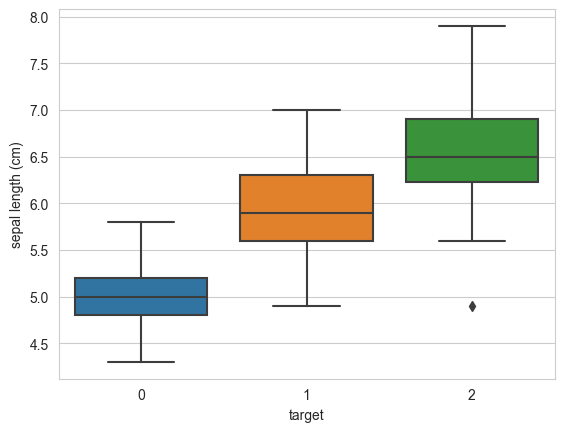

In [24]:
sns.boxplot(data=df, x='target', y='sepal length (cm)');

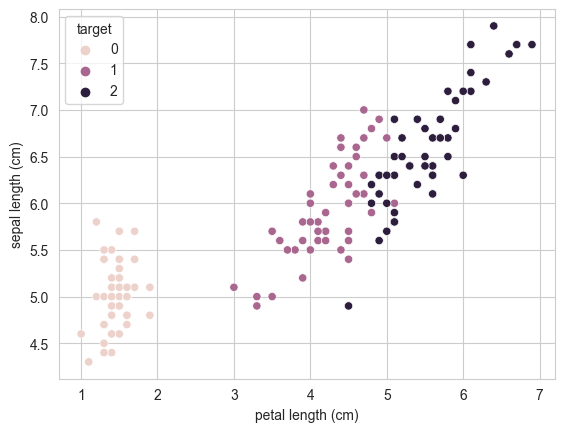

In [25]:
sns.scatterplot(data=df, x='petal length (cm)', y='sepal length (cm)', hue='target');

## Restricting

In [31]:
df[((df['target'] != 0) & (df['target'] != 1)) | (df['sepal length (cm)'] > 5.5)]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
14,5.8,4.0,1.2,0.2,0
15,5.7,4.4,1.5,0.4,0
18,5.7,3.8,1.7,0.3,0
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [32]:
df_without_group2 = df[df.target < 2]
df_without_group2

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


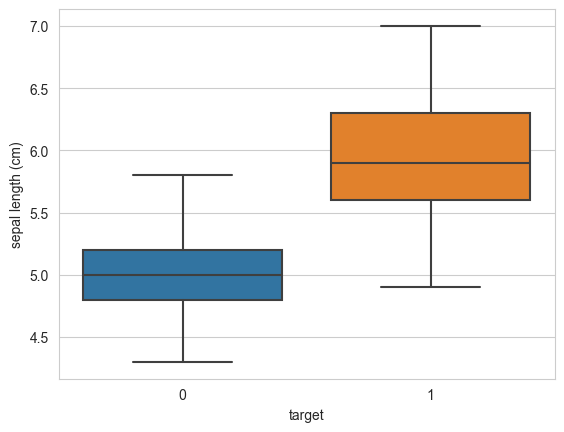

In [33]:
sns.boxplot(data=df_without_group2, x='target', y='sepal length (cm)');

In [34]:
df_without_group1 = df[(df.target == 0) | (df.target == 2)]
df_without_group1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


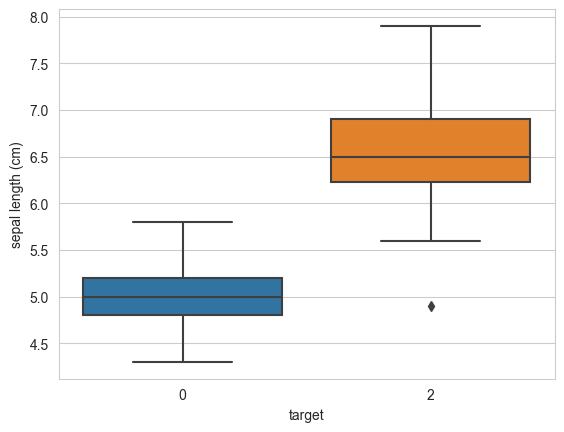

In [35]:
sns.boxplot(data=df_without_group1, x='target', y='sepal length (cm)');

# Fancy seaborn plots

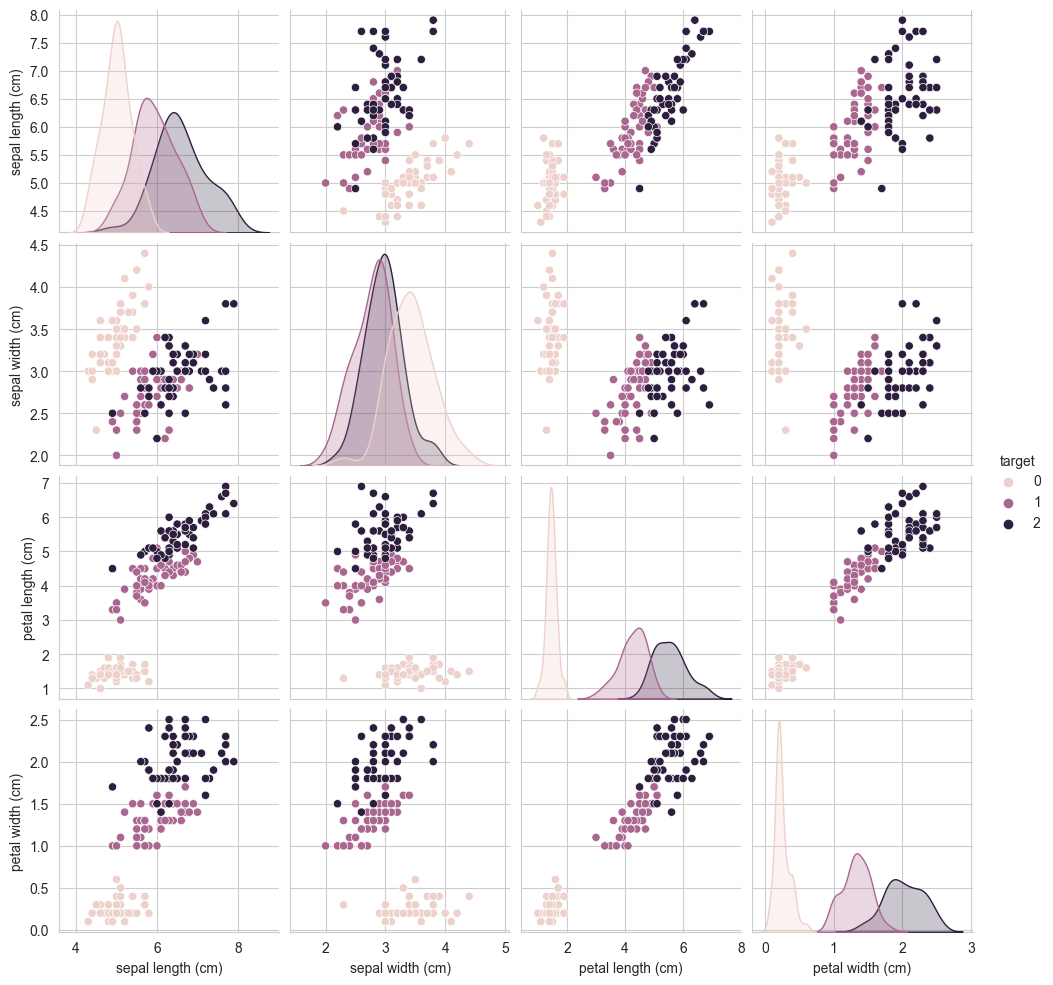

In [36]:
sns.pairplot(data=df, hue='target');

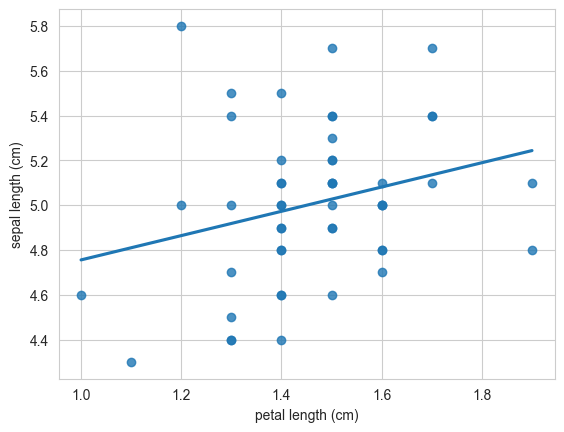

In [37]:
sns.regplot(data=df[df.target==0], x='petal length (cm)', y='sepal length (cm)', ci=None);

# Indexing

In [39]:
# Selecting a row based on its location: iloc
df.iloc[0]

sepal length (cm)    5.1
sepal width (cm)     3.5
petal length (cm)    1.4
petal width (cm)     0.2
target               0.0
Name: 0, dtype: float64

In [ ]:
# Here, the indexes are ordered, so the result is the same as above for loc
df.loc[0]

# SciPy

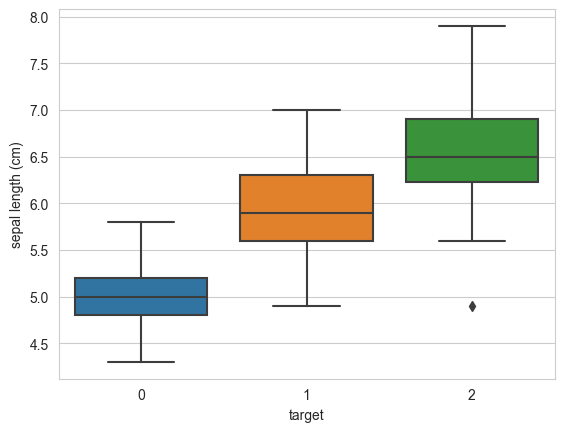

In [45]:
sns.boxplot(data=df, x='target', y='sepal length (cm)');

In [46]:
values_group0 = df[df.target==0]['sepal length (cm)']
values_group1 = df[df.target==1]['sepal length (cm)']

In [47]:
from scipy.stats import ttest_ind
ttest_ind(values_group0, values_group1)

Ttest_indResult(statistic=-10.52098626754911, pvalue=8.985235037487079e-18)

In [48]:
from scipy.stats import f_oneway
f_oneway(df[df.target==0]['sepal length (cm)'], df[df.target==1]['sepal length (cm)'], df[df.target==2]['sepal length (cm)'])

F_onewayResult(statistic=119.26450218450468, pvalue=1.6696691907693826e-31)

# Scikit-learn / sklearn

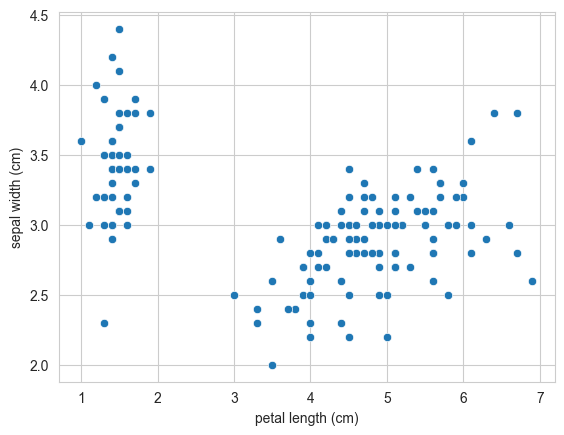

In [49]:
# Assume we don't know the species of the plants
sns.scatterplot(data=df, x='petal length (cm)', y='sepal width (cm)');

In [50]:
# Let's try to cluster the data
from sklearn.cluster import KMeans

# Create an instance of the class with 3 clusters
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)

# Fit the data to the model
kmeans.fit(df[['petal length (cm)', 'sepal width (cm)']])

C:\Users\joesterle\anaconda3\envs\DataScience\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, n_init=10, random_state=42)

<Axes: xlabel='petal length (cm)', ylabel='sepal width (cm)'>

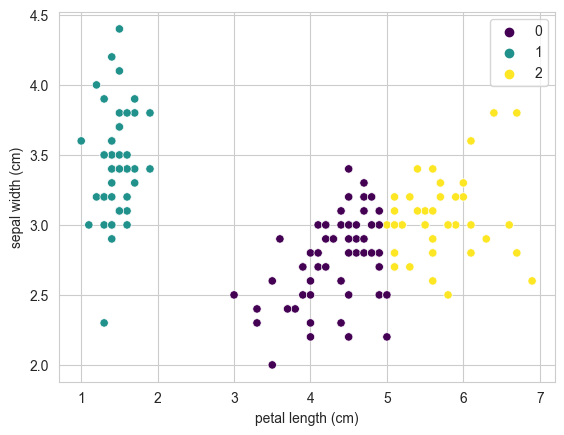

In [53]:
# Plot the clusters
sns.scatterplot(
    data=df, x='petal length (cm)', y='sepal width (cm)',
    hue=kmeans.labels_, palette='viridis')

<Axes: xlabel='petal length (cm)', ylabel='sepal width (cm)'>

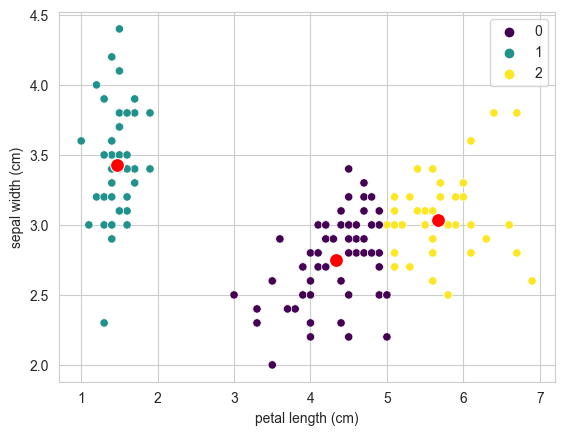

In [55]:
# Plot the clusters
sns.scatterplot(data=df, x='petal length (cm)', y='sepal width (cm)', hue=kmeans.labels_, palette='viridis')
# Plot the cluster centers
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], s=100, color='red')

<Axes: xlabel='petal length (cm)', ylabel='sepal width (cm)'>

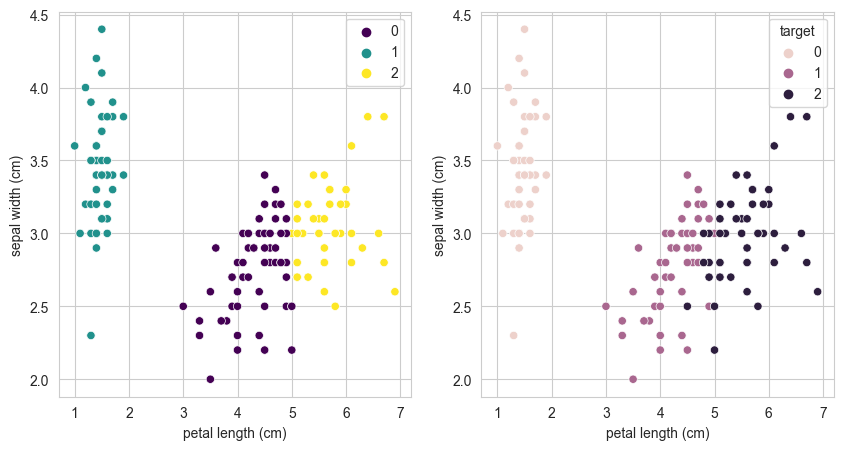

In [54]:
from matplotlib import pyplot as plt

# Plot original clusters and the predicted clusters side by side

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

ax = axs[0]
sns.scatterplot(ax=ax, data=df, x='petal length (cm)', y='sepal width (cm)', hue=kmeans.labels_, palette='viridis')

ax = axs[1]
sns.scatterplot(data=df, x='petal length (cm)', y='sepal width (cm)', hue='target')

# Some more SciPy

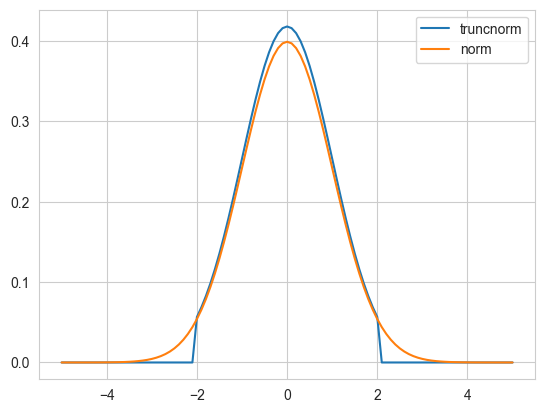

In [56]:
import numpy as np
from scipy.stats import truncnorm, norm

x = np.linspace(-5, 5, 101)

plt.figure()
plt.plot(x, truncnorm.pdf(x=x, a=-2, b=2, loc=0, scale=1), label='truncnorm')
plt.plot(x, norm.pdf(x=x, loc=0, scale=1), label='norm')
plt.legend()
plt.show()

# Interpolation

Linear interpolation can be done in numpy. For more advanced interpolation techniques, scipy offers a variety of methods for 1d and more dimensions.

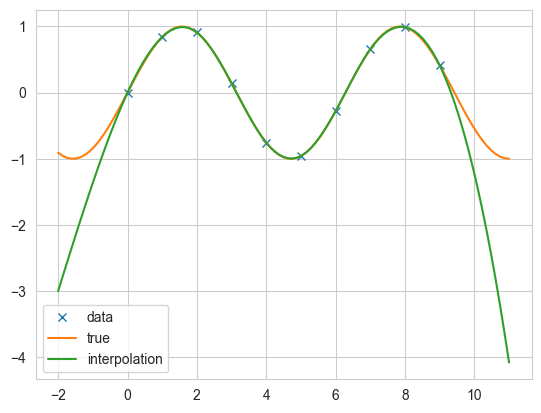

In [59]:
from scipy.interpolate import CubicSpline

# Generate data
x = np.arange(10)
y = np.sin(x)

# Interpolate data
int_fun = CubicSpline(x, y)

# Define grid to evaluate interpolation
x_new = np.linspace(-2, 11, 101)

# Plot
plt.figure()
plt.plot(x, y, 'x', label='data')
plt.plot(x_new, np.sin(x_new), label='true')
plt.plot(x_new, int_fun(x_new), label='interpolation')
plt.legend()
plt.show()